In [42]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
import pandas as pd
import os
import scipy.io
import scipy.misc
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.fftpack import dct, idct
from scipy.optimize import minimize

<h2>Exer 3.2</h2>

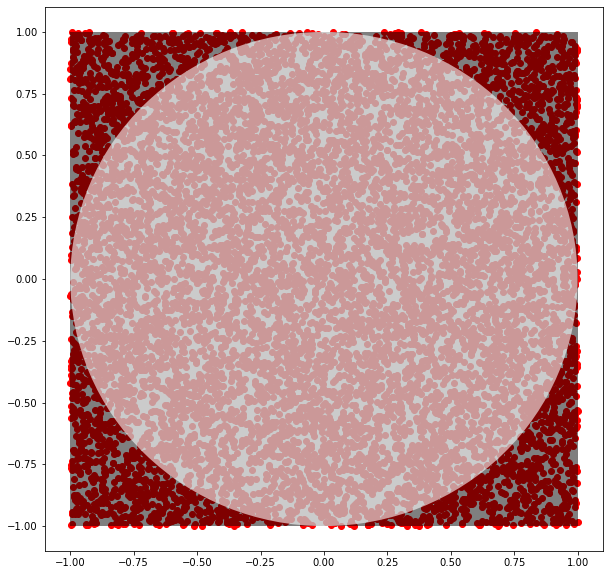

In [104]:
S = 2 #side of square
R = 1 #radius of circle

#Graph the Circle, Square, and the 10000 normally distributed dart throws
f, ax = plt.subplots(figsize=(10,10))
ax.plot()
ax.add_patch(Rectangle((-1,-1), S, S, fill=True, facecolor='black', alpha = 0.5));
ax.add_patch(Circle((0,0), R, fill=True, facecolor='white', alpha = 0.6 ));
ax.scatter(np.linspace(-1,1,10000), sp.uniform(-1,2).rvs(10000), color='red');

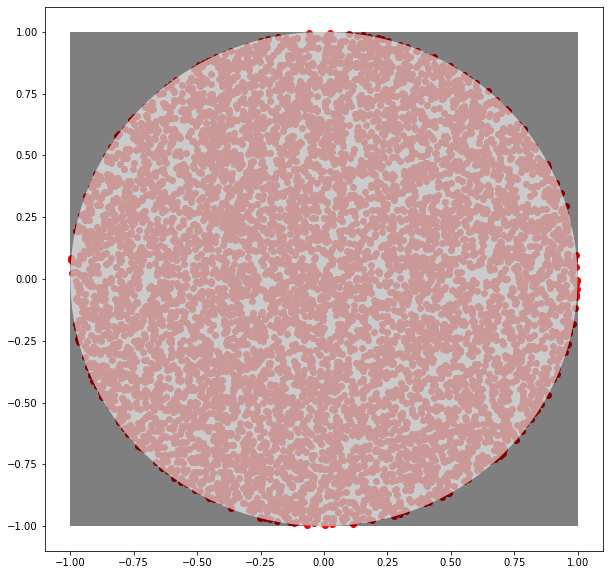

In [62]:
#How many went inside the circle?
check = np.vstack((sp.uniform(-1,2).rvs(10000), sp.uniform(-1,2).rvs(10000))).reshape(-1,2)
dim2_pts = sum(check[:,0]**2 + check[:,1]**2 <= 1)/10000

#Graph the Circle, Square, and the dart throws that landed inside the circle
f, ax = plt.subplots(figsize=(10,10))
ax.add_patch(Rectangle((-1,-1), S, S, fill=True, facecolor='black', alpha = 0.5))
ax.add_patch(Circle((0,0), R, facecolor='white', alpha = 0.6 ))
ax.scatter(check[(check[:,0]**2 + check[:,1]**2 <= 1)][:,0],
           check[(check[:,0]**2 + check[:,1]**2 <= 1)][:,1], color='red');

In [63]:
print(dim2_pts*100,"% of the dots are inside the circle, close enough to pi/4")

78.08 % of the dots are inside the circle.


IndexError: index 8 is out of bounds for axis 0 with size 8

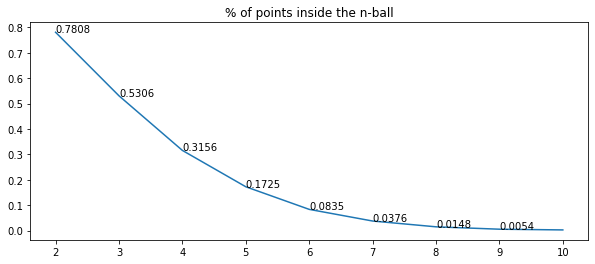

In [96]:
#plotting for dimension: 3 to 10
N = 10000
dataset = pd.DataFrame(np.vstack((sp.uniform(-1,2).rvs(N), sp.uniform(-1,2).rvs(N))).reshape(-1,2), columns=['x','y'])

d = np.arange(3,11,1)

inside_n_ball = np.array(dim2_pts)
for i,n in enumerate(d):
    dataset[i+3] = sp.uniform(-1,2).rvs(N)
    dim_n_pts = dataset[((dataset**2).sum(axis=1) <= R**2)] #check how many is inside the sphere
    inside_n_ball = np.append(inside_n_ball, dim_n_pts.shape[0]/N)

#Plot of Fraction of Points that landed inside the sphere
f, ax = plt.subplots(figsize=(10,4))
ax.plot(range(2,11),inside_n_ball)
ax.set_title('% of points inside the n-ball')
for i in range(10):
  ax.text(d[i]-1, inside_n_ball[i], inside_n_ball[i], size=10)



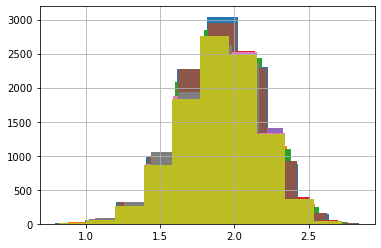

In [65]:
#Radii of the randomly sampled points for each N

h = np.arange(2,11,1)
for i,n in enumerate(h):
    dataset[i+2] = sp.uniform(-1,2).rvs(N)
    np.sqrt((dataset**2).sum(axis=1)).hist();

<h2>Exer 3.3</h2>

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.fftpack import dct, idct
from scipy.optimize import minimize


In [118]:
def cosamp(phi, u, s, epsilon=1e-10, max_iter=60):
    """
    Return an `s`-sparse approximation of the target signal
    Input:
        - phi, sampling matrix
        - u, noisy sample vector
        - s, sparsity
    """
    a = np.zeros(phi.shape[1])
    v = u
    it = 0 # count
    halt = False
    while not halt:
        it += 1
        print("Iteration {}\r".format(it), end="")
        
        y = np.dot(np.transpose(phi), v)
        omega = np.argsort(y)[-(2*s):] # large components
        omega = np.union1d(omega, a.nonzero()[0]) # use set instead?
        phiT = phi[:, omega]
        b = np.zeros(phi.shape[1])
        # Solve Least Square
        b[omega], _, _, _ = np.linalg.lstsq(phiT, u)
        
        # Get new estimate
        b[np.argsort(b)[:-s]] = 0
        a = b
        
        # Halt criterion
        v_old = v
        v = u - np.dot(phi, a)

        halt = (np.linalg.norm(v - v_old) < epsilon) or \
            np.linalg.norm(v) < epsilon or \
            it > max_iter
        
    return a

In [134]:
# Create K-Sparse vectors, K = 5

n = 1000
s = np.zeros(n)

index= np.floor(np.random.rand(5) * n).astype(int)
s[index]= value

In [155]:
#Fourier basis
psi = dct(np.identity(n)) #Build psi
x = psi @ s


In [136]:
#Gaussian random sampling C
p = 100
C = np.random.randn(p,n)
y = C @ x


In [156]:
## Solve compressed sensing problem

Theta = C @ psi       # Measure rows of Psi
s_hat = cosamp(Theta,y,p) #Compressed sensing based on measurement
#xrecon = idct(s_hat) #reconstruct full signal


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


Text(0.5, 1.0, 'Average Relative Error')

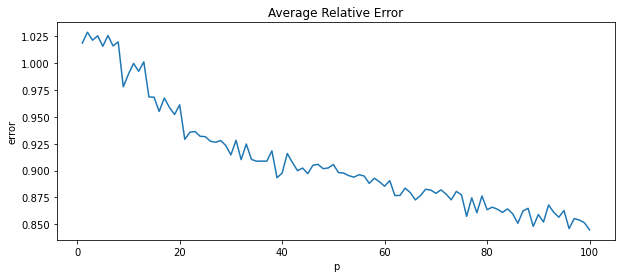

In [157]:
#average relative error

AveRel = []
for p in np.arange(1,101):
    ave_rel_err=[]
    for i in range(10):
        C1 = np.random.randn(p,n)
        y1= C1 @ psi @ s 
        Theta1 = C1 @ psi
        s_hat1 = cosamp(Theta1,y1,p) 
        error = np.linalg.norm(s - s_hat1) / np.linalg.norm(s)
        ave_rel_err.append(error)
    
    AveRel_E = np.mean(ave_rel_err)
    AveRel.append(AveRel_E)

f, ax = plt.subplots(figsize=(10,4))
ax.plot(np.arange(1,101),AveRel)
ax.set_xlabel('p')
ax.set_ylabel('error')

ax.set_title('Average Relative Error')  

<p>Average relative error decreases as we increase p.</p>


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


Text(0.5, 1.0, 'L1 Error')

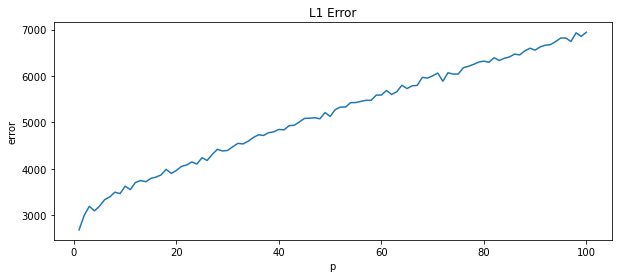

In [158]:
#l1 error

L1 = []
for p in np.arange(1,101):
    l1_err=[]
    for i in range(10):
        C1 = np.random.randn(p,n)
        y1= C1 @ psi @ s 
        Theta1 = C1 @ psi
        s_hat1 = cosamp(Theta1,y1,p) 
        error = np.linalg.norm(s - s_hat1,ord=1)
        l1_err.append(error)
    
    L1_E = np.mean(l1_err)
    L1.append(L1_E)

f, ax = plt.subplots(figsize=(10,4))
ax.plot(np.arange(1,101),L1)
ax.set_xlabel('p')
ax.set_ylabel('error')

ax.set_title('L1 Error') 

<p>L1 error increases along with p.</p>

<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


Text(0.5, 1.0, 'L0 Error')

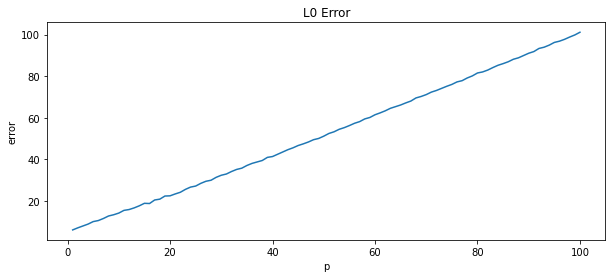

In [160]:
#l0 error

L0 = []
for p in np.arange(1,101):
    l0_err=[]
    for i in range(10):
        C1 = np.random.randn(p,n)
        y1= C1 @ psi @ s 
        Theta1 = C1 @ psi
        s_hat1 = cosamp(Theta1,y1,p) 
        error = np.linalg.norm(s - s_hat1,ord=0)
        l0_err.append(error)
    
    L0_E = np.mean(l0_err)
    L0.append(L0_E)

f, ax = plt.subplots(figsize=(10,4))
ax.plot(np.arange(1,101),L0)
ax.set_xlabel('p')
ax.set_ylabel('error')

ax.set_title('L0 Error')

<p>L0 error increases along with p.</p>

<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


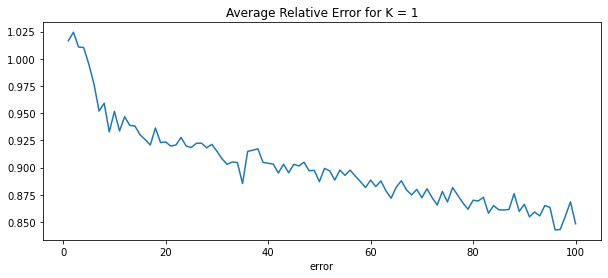

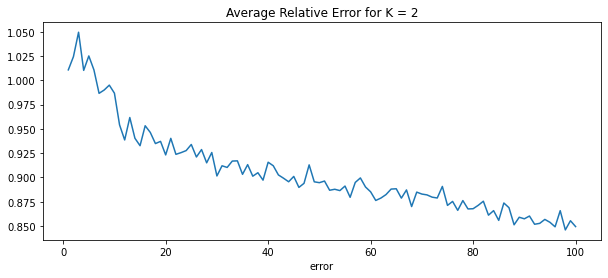

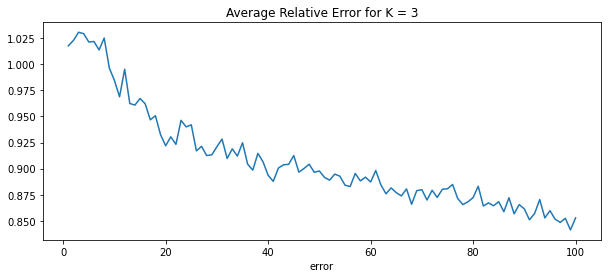

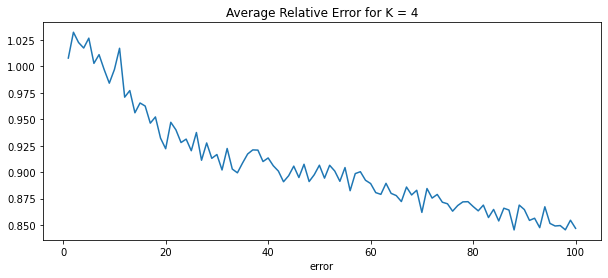

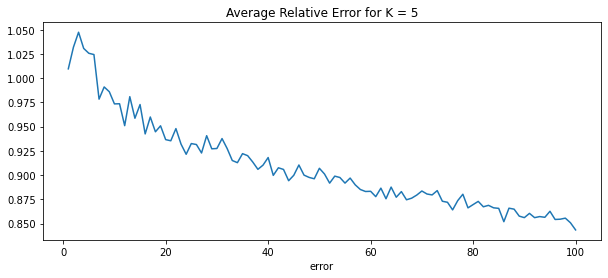

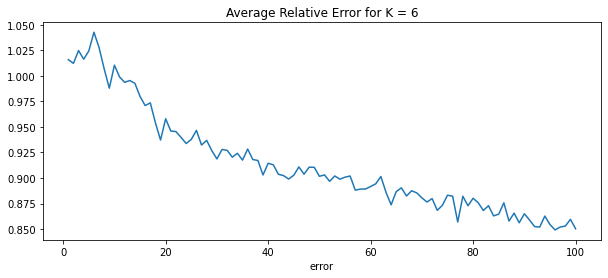

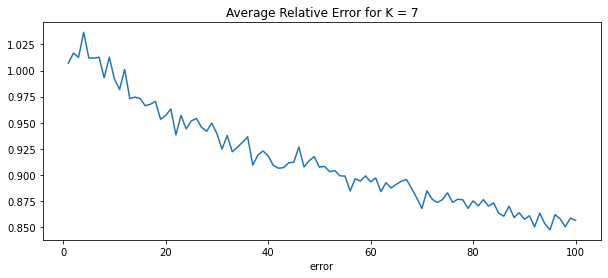

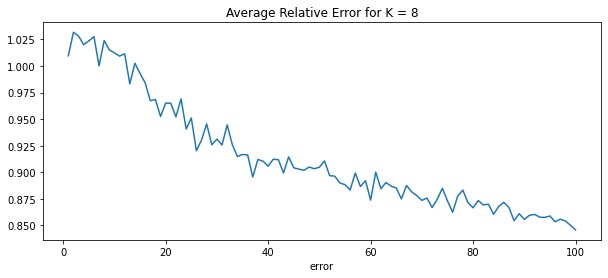

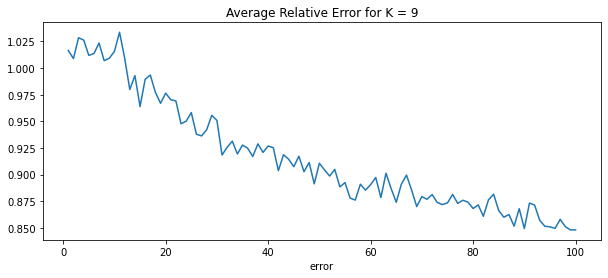

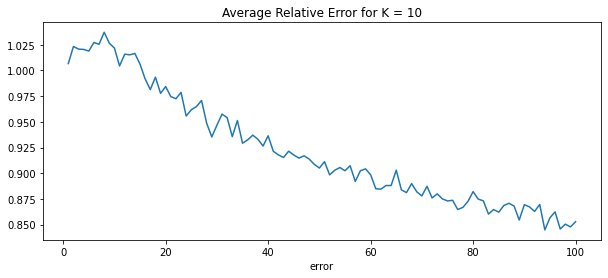

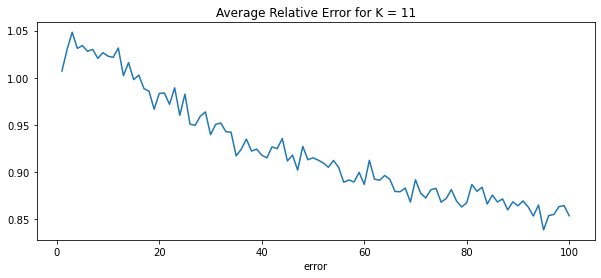

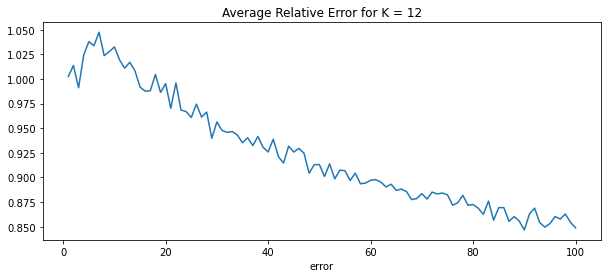

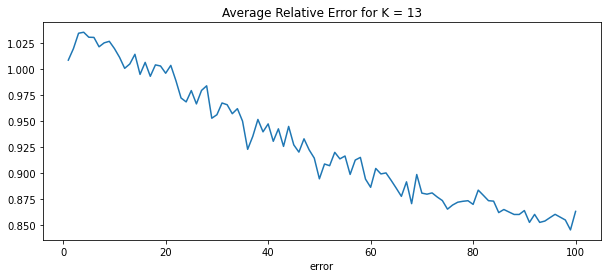

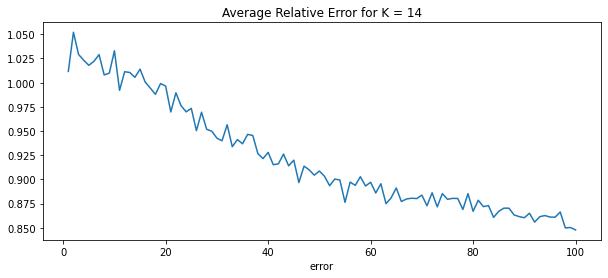

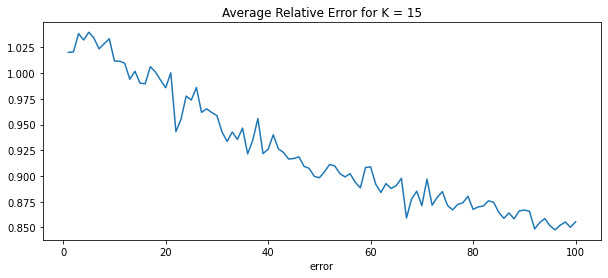

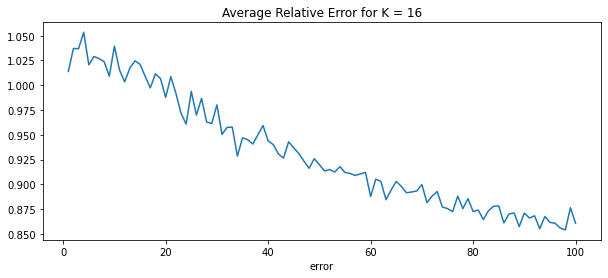

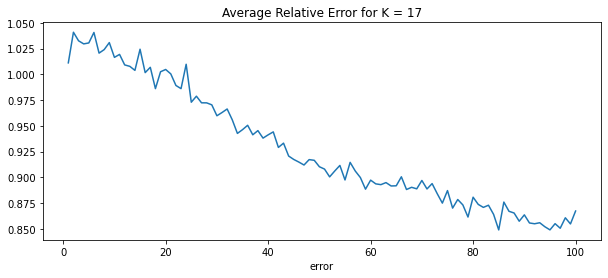

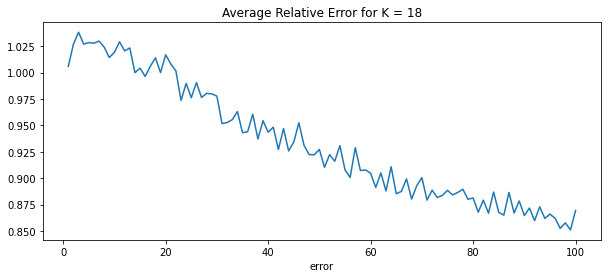

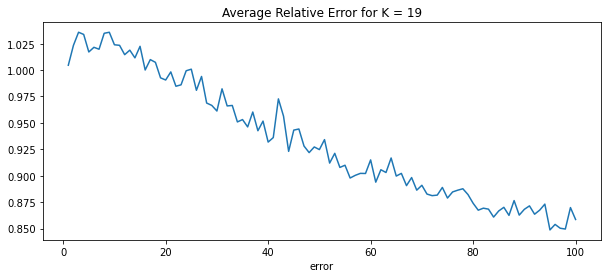

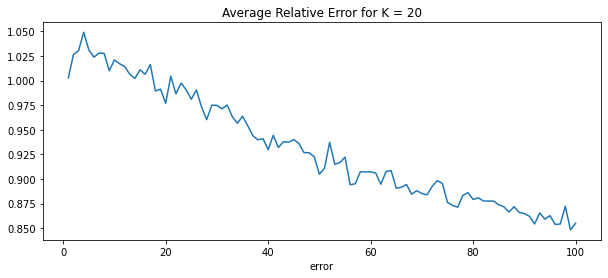

In [151]:
for k in range(1,21):
    # Create a K-sparse vector
    K = k
    s2 = np.zeros(n)
    index= np.floor(np.random.rand(K) * n).astype(int)
    value= np.floor(np.random.rand(K) * 10).astype(int)
    s2[index]= value

    AveRel2 = []
    for p in np.arange(1,101):
        ave_rel_err2=[]
        for i in range(10):
            C2 = np.random.randn(p,n)
            y2 = C2 @ psi @ s2 
            Theta2 = C2 @ psi
            s_hat2 = cosamp(Theta2,y2,p) 
            error2 = np.linalg.norm(s2 - s_hat2) / np.linalg.norm(s2)
            ave_rel_err2.append(error2)
    
        AveRel2_E = np.mean(ave_rel_err2)
        AveRel2.append(AveRel2_E)

    f, ax = plt.subplots(figsize=(10,4))
    ax.plot(np.arange(1,101),AveRel2)
    ax.set_xlabel('p')
    ax.set_xlabel('error')
    ax.set_title('Average Relative Error for K = '+ str(k)) 


<p>Erratum: <i> x-label is p, y-label is error.</i></p>


<p>Note that for any K from 1 to 20, trend still remains, i.e., as p increases, error decreases</p>

<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


<ipython-input-118-8eb77a3823e8>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


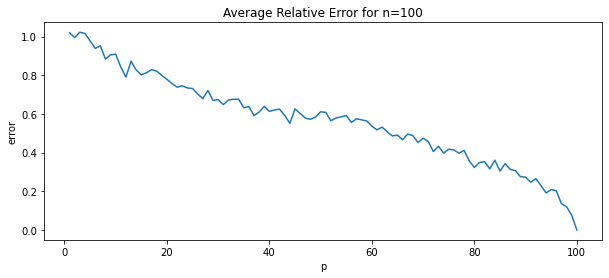

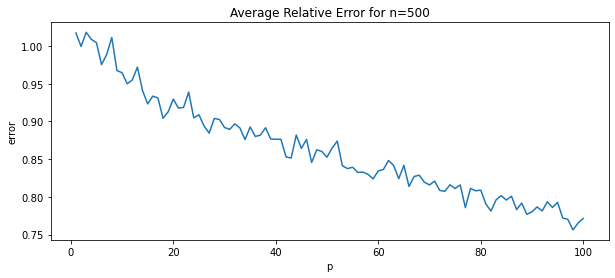

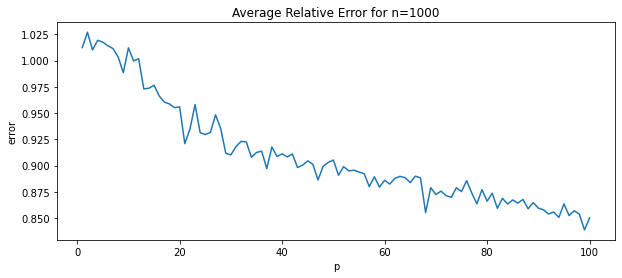

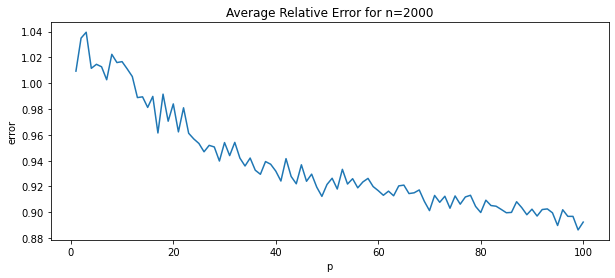

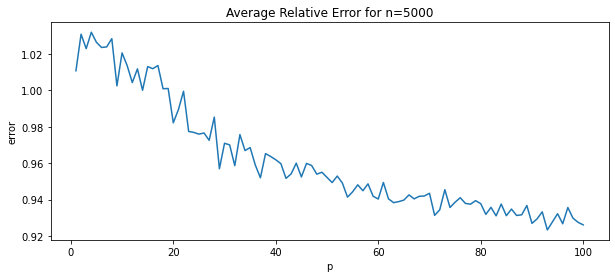

In [164]:
for n3 in [100, 500, 1000, 2000, 5000]:

    s3 = np.zeros(n3)
    index= np.floor(np.random.rand(5) * n3).astype(int)
    value= np.floor(np.random.rand(5) * 10).astype(int)
    s3[index]= value
    psi3 = dct(np.identity(n3)) 
    
    AveRel3 = []
    for p in np.arange(1,101):
        ave_rel_err3=[]
        for i in range(10):
            C3 = np.random.randn(p,n3)
            y3 = C3 @ psi3 @ s3 
            Theta3 = C3 @ psi3
            s_hat3 = cosamp(Theta3,y3,p) 
            error3 = np.linalg.norm(s3 - s_hat3) / np.linalg.norm(s3)
            ave_rel_err3.append(error3)
    
        AveRel3_E = np.mean(ave_rel_err3)
        AveRel3.append(AveRel3_E)
    

    f, ax = plt.subplots(figsize=(10,4))
    ax.plot(np.arange(1,101),AveRel3)
    ax.set_xlabel('p')
    ax.set_ylabel('error')

    ax.set_title('Average Relative Error for n='+ str(n3))


<p>Note that for any n from [100,500,1000,2000,5000], trend still remains, i.e., as p increases, error decreases</p>

<h2>Exer 3.6</h2>

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
import scipy.misc

#Load Cylinder flow data set
mat_contents = scipy.io.loadmat(os.path.join('CYLINDER_ALL'))
vort=mat_contents['VORTALL']

vort

array([[-9.37978e-15, -8.81369e-15, -8.98807e-15, ..., -9.23186e-15,
        -9.41491e-15, -9.30876e-15],
       [-9.30657e-15, -8.89068e-15, -8.94398e-15, ..., -9.36109e-15,
        -9.56562e-15, -9.35889e-15],
       [-9.42567e-15, -8.94825e-15, -9.03783e-15, ..., -9.46820e-15,
        -9.53402e-15, -9.57157e-15],
       ...,
       [-1.67006e-02, -1.76447e-02, -2.65121e-02, ..., -1.25425e-01,
        -6.72113e-02, -3.29421e-02],
       [-3.05893e-02, -2.99358e-02, -3.58798e-02, ..., -1.39642e-01,
        -8.19676e-02, -4.75584e-02],
       [-4.38674e-02, -4.12466e-02, -4.40273e-02, ..., -1.53373e-01,
        -9.64910e-02, -6.18917e-02]])

In [36]:
#Coarsen by a factor of 20
nvort=np.copy(np.real(np.reshape(vort[:,0],(449,199))))
dim1 = (np.array(nvort.shape) * (1/20)).astype(int)
a=dim1[0]*dim1[1]

In [39]:
#Build a library of coarsened measurements
from skimage.transform import resize
b = vort.shape[1]
lib = np.zeros((a,b))
for k in range(b):
    temp1 = np.copy(np.real(np.reshape(vort[:,k],(449,199))))
    temp1_low = resize(temp, dim1, anti_aliasing=True) 
    lib[:,k] = np.reshape(temp_low,a)


In [40]:
# Pick a column of the full flow field matrix
nnvort = np.copy(vort[:,1])

#Add Gausian random Noise
y1 = np.copy(nnvort) + 0.18*np.random.randn(*nnvort.shape) 

In [41]:
# Downsample noisy field by a factor of 20

dim2= (np.array(nvort.shape) * (1/20)).astype(int)
temp2 = np.reshape(np.copy(y),(449,199))
temp2_low = resize(temp2, dim2, anti_aliasing=True)
y2 = np.reshape(temp2_low, a)

In [ ]:
#Use SRC